In [390]:
import pymolpro
import pandas as pd

In [391]:
backend = 'local' 
project_name = 'INV24_methodtest'
parallel = 8

In [392]:
methods = {"HF": "hf",
"MP2": "mp2",
"MP3": "mp3",
"MP4": "mp4",
"PAPT2":"PAPT;MP2",
"PAPT3":"PAPT;MP3",
"PAPT4":"PAPT;MP4",
"CCSD":"CCSD",
"CCSD(T)":"CCSD(T)" }
bases = ['cc-pVDZ','cc-pVTZ']

In [393]:
db = pymolpro.database.load("GMTKN55_INV24")

In [394]:
small=db.subset(open_shell=False,max_electrons=30)
print(small)

GMTKN55 INV24 (closed shell only) (maximum number of electrons 30):

Molecules:
H2O: {'geometry': '3\n  \n   O   -0.02085472758024      0.00000000000000     -0.01495598121153\n   H   0.01876805202920      0.00000000000000      0.94578209125484\n   H   0.89775667555104      0.00000000000000     -0.29748911004330\n', 'description': 'H2O'}
H2S: {'geometry': '3\n  \n   S   -0.20556127464025      0.00000000000000     -0.14507162979824\n   H   -0.01007104299822      0.00000000000000      1.18200447183515\n   H   1.11130231763847      0.00000000000000     -0.40359584203690\n', 'description': 'H2S'}
Ether_TS: {'geometry': '9\n  \n   O   -0.00020946572717      0.00033803651382      0.01009578182224\n   C   1.37497499316945      0.00000551844024      0.01033708407522\n   C   -1.37521529311648      0.00068147573508      0.00978328762624\n   H   1.76662285429289      0.40690776018797     -0.93108108766811\n   H   1.76646977000414      0.61379439668452      0.82991943080001\n   H   1.77133317507623

In [395]:
results = {}
for method in methods:
    results[method] = {}
    for basis in bases:
        results[method][basis] = pymolpro.database.run(small, methods[method], basis, location=project_name,
                                                       preamble= 'angstrom' ,backend=backend ,parallel=parallel)
        if results[method][basis].failed: print(method, basis, 'failed', results[method][basis].project_directory)
        
print(results)       

{'HF': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f4938992410>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f489b1776a0>}, 'MP2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f489a473af0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f493843df30>}, 'MP3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f4978ce69b0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f4a66e970d0>}, 'MP4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f493b8a99c0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f49587e97b0>}, 'PAPT2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f48f2b500a0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f49783b5150>}, 'PAPT3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f4998b18e80>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f493a6775e0>}, 'PAPT4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f49596bb550>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f4938bc2050>}, 'CCSD':

In [397]:
extrapolate={}
for method in  methods:
    extrapolate[method]=pymolpro.database.basis_extrapolate(results[method].values(), results["HF"].values())[0]
print(extrapolate)

{'HF': <pymolpro.database.Database object at 0x7f48f06626e0>, 'MP2': <pymolpro.database.Database object at 0x7f48f012ebf0>, 'MP3': <pymolpro.database.Database object at 0x7f48a1a849a0>, 'MP4': <pymolpro.database.Database object at 0x7f489fcf9870>, 'PAPT2': <pymolpro.database.Database object at 0x7f489f7a39a0>, 'PAPT3': <pymolpro.database.Database object at 0x7f489eb662c0>, 'PAPT4': <pymolpro.database.Database object at 0x7f48f0266770>, 'CCSD': <pymolpro.database.Database object at 0x7f48a0a184c0>, 'CCSD(T)': <pymolpro.database.Database object at 0x7f48a143e650>}


In [401]:
pd.options.display.float_format = '{:,.2f}'.format
analyse=pymolpro.database.analyse(list(extrapolate.values()),extrapolate['CCSD(T)'],unit='kJ/mol')
analyse['reaction statistics']

,HF,MP2,MP3,MP4,PAPT;MP2,PAPT;MP3,PAPT;MP4,CCSD,CCSD(T)
,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z
MAD,20.02,1.84,2.28,0.27,2.33,2.22,0.40,3.26,0.00
MAXD,44.79,2.80,3.31,0.42,3.98,3.60,0.97,7.26,0.00
RMSD,26.88,2.04,2.40,0.33,2.61,2.44,0.57,4.36,0.00
MSD,9.84,-1.84,-0.07,0.27,0.33,0.18,-0.25,1.57,0.00
STDEVD,30.64,1.09,2.94,0.23,3.17,2.98,0.63,4.99,0.00


In [414]:
pd.options.display.float_format = '{:,.2f}'.format
analyse=pymolpro.database.analyse([result['cc-pVDZ'] for result in results.values()],small,unit='kJ/mol')
analyse['reaction statistics']

,HF,MP2,MP3,MP4,PAPT;MP2,PAPT;MP3,PAPT;MP4,CCSD,CCSD(T)
,cc-pVDZ,cc-pVDZ,cc-pVDZ,cc-pVDZ,cc-pVDZ,cc-pVDZ,cc-pVDZ,cc-pVDZ,cc-pVDZ
MAD,21.10,13.65,14.63,15.43,14.06,14.28,14.97,14.32,14.93
MAXD,44.98,17.54,18.93,20.82,19.34,19.49,20.77,19.63,20.77
RMSD,27.22,13.94,14.96,15.90,14.55,14.76,15.52,14.84,15.49
MSD,17.68,13.65,14.63,15.43,14.06,14.28,14.97,14.32,14.93
STDEVD,25.36,3.42,3.82,4.74,4.57,4.56,5.03,4.74,5.06


In [418]:
pd.options.display.float_format = '{:,.2f}'.format
analyse=pymolpro.database.analyse([result['cc-pVDZ'] for result in results.values()],results['CCSD(T)']['cc-pVDZ'],unit='kJ/mol')
analyse['reaction statistics']

,HF,MP2,MP3,MP4,PAPT;MP2,PAPT;MP3,PAPT;MP4,CCSD,CCSD(T)
,cc-pVDZ,cc-pVDZ,cc-pVDZ,cc-pVDZ,cc-pVDZ,cc-pVDZ,cc-pVDZ,cc-pVDZ,cc-pVDZ
MAD,19.37,1.62,1.34,0.69,0.87,1.02,0.03,1.28,0.00
MAXD,33.17,3.23,1.84,1.73,1.43,1.28,0.06,1.70,0.00
RMSD,22.05,2.00,1.44,1.01,1.03,1.07,0.04,1.31,0.00
MSD,2.74,-1.28,-0.30,0.49,-0.87,-0.65,0.03,-0.61,0.00
STDEVD,26.80,1.87,1.72,1.08,0.67,1.05,0.03,1.42,0.00


In [423]:
pd.options.display.float_format = '{:,.2f}'.format
analyse=pymolpro.database.analyse([result['cc-pVTZ'] for result in results.values()],results['CCSD(T)']['cc-pVDZ'],unit='kJ/mol')
analyse['reaction statistics']

,HF,MP2,MP3,MP4,PAPT;MP2,PAPT;MP3,PAPT;MP4,CCSD,CCSD(T)
,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ
MAD,23.32,11.30,9.77,9.30,9.66,9.70,9.80,8.70,9.63
MAXD,32.14,14.44,13.42,11.23,12.85,12.74,11.48,12.18,11.51
RMSD,24.27,11.52,10.18,9.40,10.01,10.03,9.90,9.41,9.73
MSD,-1.90,-11.30,-9.77,-9.30,-9.66,-9.70,-9.80,-8.70,-9.63
STDEVD,29.64,2.72,3.51,1.68,3.20,3.11,1.72,4.36,1.71


In [403]:
pd.options.display.float_format = '{:,.2f}'.format
analyse=pymolpro.database.analyse([result['cc-pVTZ'] for result in results.values()],small, unit='kJ/mol')
analyse['reaction statistics']

,HF,MP2,MP3,MP4,PAPT;MP2,PAPT;MP3,PAPT;MP4,CCSD,CCSD(T)
,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ
MAD,19.57,3.63,5.16,5.64,5.27,5.24,5.14,6.23,5.30
MAXD,43.95,6.33,7.35,9.54,7.92,8.03,9.29,8.59,9.26
RMSD,26.16,4.10,5.50,6.28,5.71,5.72,5.99,6.89,6.02
MSD,13.04,3.63,5.16,5.64,5.27,5.24,5.14,6.23,5.30
STDEVD,27.77,2.34,2.31,3.39,2.69,2.83,3.77,3.60,3.50


In [416]:
pd.options.display.float_format = '{:,.2f}'.format
analyse=pymolpro.database.analyse([result['cc-pVTZ'] for result in results.values()],results['CCSD(T)']['cc-pVTZ'],unit='kJ/mol')
analyse['reaction statistics']

,HF,MP2,MP3,MP4,PAPT;MP2,PAPT;MP3,PAPT;MP4,CCSD,CCSD(T)
,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ
MAD,19.83,1.67,2.00,0.39,1.87,1.86,0.28,2.68,0.00
MAXD,41.35,2.93,2.79,0.81,2.76,2.70,0.67,5.40,0.00
RMSD,25.30,1.99,2.09,0.50,1.98,1.96,0.40,3.34,0.00
MSD,7.74,-1.67,-0.14,0.34,-0.03,-0.07,-0.17,0.93,0.00
STDEVD,29.50,1.31,2.56,0.45,2.42,2.40,0.44,3.93,0.00


In [419]:
pd.options.display.float_format = '{:,.2f}'.format
analyse=pymolpro.database.analyse([result['cc-pV[23]Z'] for result in results.values()],results['CCSD(T)']['cc-pV[23]Z'],unit='kJ/mol')
analyse['reaction statistics']

,HF,MP2,MP3,MP4,PAPT;MP2,PAPT;MP3,PAPT;MP4,CCSD,CCSD(T)
,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z
MAD,20.02,1.84,2.28,0.27,2.33,2.22,0.40,3.26,0.00
MAXD,44.79,2.80,3.31,0.42,3.98,3.60,0.97,7.26,0.00
RMSD,26.88,2.04,2.40,0.33,2.61,2.44,0.57,4.36,0.00
MSD,9.84,-1.84,-0.07,0.27,0.33,0.18,-0.25,1.57,0.00
STDEVD,30.64,1.09,2.94,0.23,3.17,2.98,0.63,4.99,0.00


In [422]:
pd.options.display.float_format = '{:,.2f}'.format
analyse=pymolpro.database.analyse([result['cc-pVTZ'] for result in results.values()],results['CCSD(T)']['cc-pV[23]Z'],unit='kJ/mol')
analyse['reaction statistics']

,HF,MP2,MP3,MP4,PAPT;MP2,PAPT;MP3,PAPT;MP4,CCSD,CCSD(T)
,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ,cc-pVTZ
MAD,20.02,1.66,2.31,2.44,2.10,2.16,1.94,3.35,2.10
MAXD,44.79,3.14,6.24,4.25,6.21,6.14,2.77,8.85,3.44
RMSD,26.88,2.02,3.62,2.76,3.58,3.55,2.03,5.13,2.31
MSD,9.84,0.43,1.97,2.44,2.07,2.04,1.94,3.03,2.10
STDEVD,30.64,2.42,3.72,1.58,3.58,3.56,0.73,5.07,1.16


In [405]:
extrapolate

{'HF': <pymolpro.database.Database at 0x7f48f06626e0>,
 'MP2': <pymolpro.database.Database at 0x7f48f012ebf0>,
 'MP3': <pymolpro.database.Database at 0x7f48a1a849a0>,
 'MP4': <pymolpro.database.Database at 0x7f489fcf9870>,
 'PAPT2': <pymolpro.database.Database at 0x7f489f7a39a0>,
 'PAPT3': <pymolpro.database.Database at 0x7f489eb662c0>,
 'PAPT4': <pymolpro.database.Database at 0x7f48f0266770>,
 'CCSD': <pymolpro.database.Database at 0x7f48a0a184c0>,
 'CCSD(T)': <pymolpro.database.Database at 0x7f48a143e650>}

In [406]:
results_with_extrapolation = results
for method in results_with_extrapolation.keys():
    results_with_extrapolation[method]['cc-pV[23]Z'] = extrapolate[method]
results_with_extrapolation
results = results_with_extrapolation

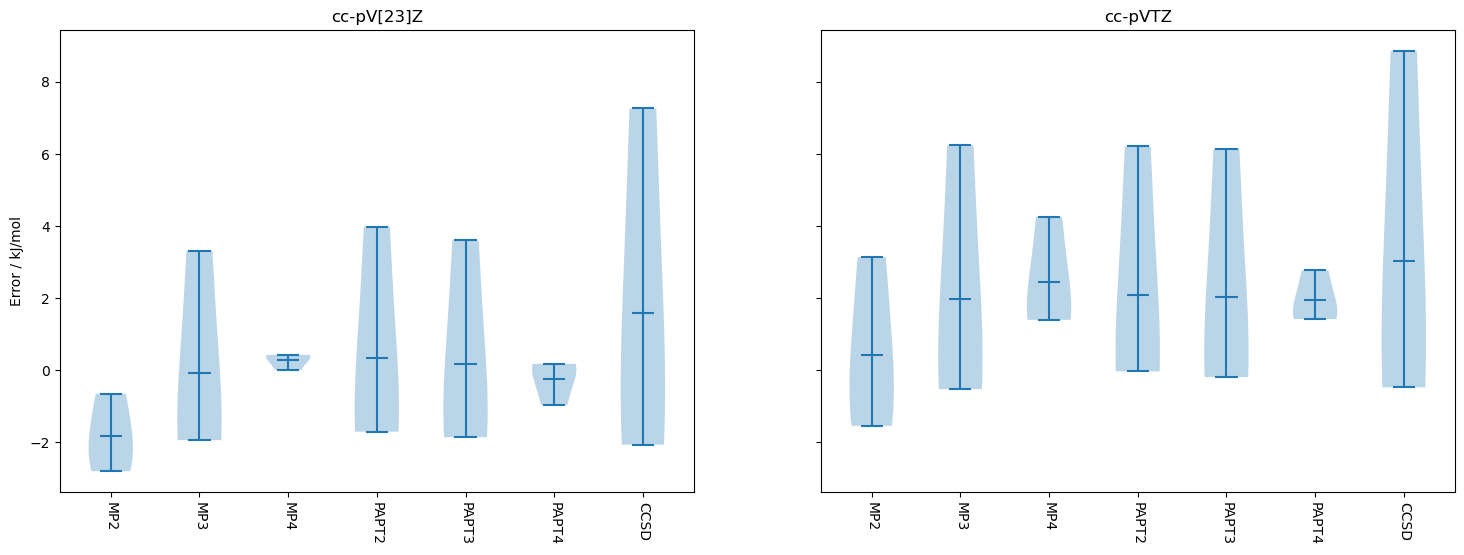

In [425]:
import matplotlib.pyplot as plt

methods_pruned = [method for method in methods if (method != 'HF') and (method != 'CCSD(T)')]
bases_pruned = ['cc-pV[23]Z','cc-pVTZ']
fig, panes = plt.subplots(nrows=1, ncols=len(bases_pruned), sharey=True, figsize=(18, 6))

for pane in range(len(bases_pruned)):
    data = []
    for method in methods_pruned:
        data.append(
            pymolpro.database.analyse(results[method][bases_pruned[pane]],
                                      results['CCSD(T)']['cc-pV[23]Z'],'kJ/mol')['reaction energy deviations'].to_numpy()[:, 0]
        )
    panes[pane].violinplot(data, showmeans=True, showextrema=True, vert=True, bw_method='silverman')
    panes[pane].set_xticks(range(1, len(methods_pruned) + 1), labels=methods_pruned, rotation=-90)
    panes[pane].set_title(bases_pruned[pane])
panes[0].set_ylabel('Error / kJ/mol')
plt.savefig(project_name + ".violin.pdf")


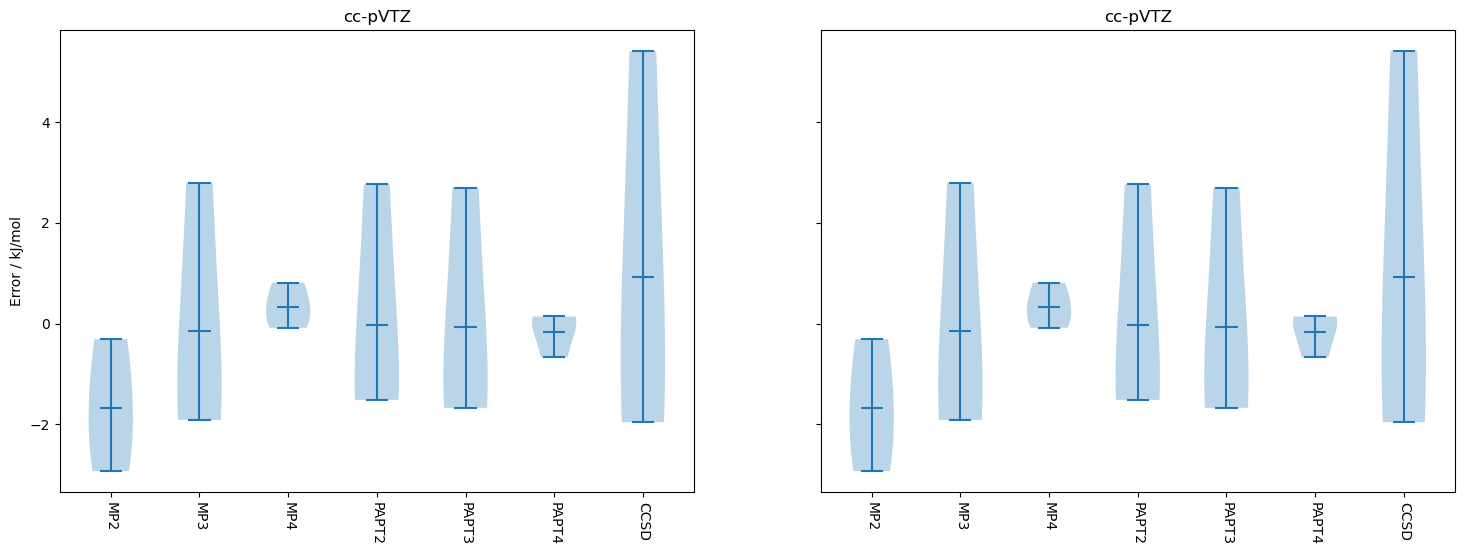

In [431]:
import matplotlib.pyplot as plt

methods_pruned = [method for method in methods if (method != 'HF') and (method != 'CCSD(T)')]
bases_pruned = ['cc-pVTZ', 'cc-pVTZ']
fig, panes = plt.subplots(nrows=1, ncols=len(bases_pruned), sharey=True, figsize=(18, 6))

for pane in range(len(bases_pruned)):
    data = []
    for method in methods_pruned:
        data.append(
            pymolpro.database.analyse(results[method][bases_pruned[pane]],
                                      results['CCSD(T)']['cc-pVTZ'],'kJ/mol')['reaction energy deviations'].to_numpy()[:, 0]
        )
    panes[pane].violinplot(data, showmeans=True, showextrema=True, vert=True, bw_method='silverman')
    panes[pane].set_xticks(range(1, len(methods_pruned) + 1), labels=methods_pruned, rotation=-90)
    panes[pane].set_title(bases_pruned[pane])
panes[0].set_ylabel('Error / kJ/mol')
plt.savefig(project_name + ".violin.pdf")


In [160]:
len(extrapolate)

1